# <font color='blue'>ANÁLISE DE DADOS DO PREÇO DA GASOLINA E ETANOL</font>

## Sumário:
>**1-Descrição do Projeto**<br>
>**2-Carregando os Dados**<br>
>**3-Análise Exploratória dos Dados**<br>
>**4-Tratamento e Limpeza**<br>
>**5-Salvando Dataset após Processamento de Dados**<br>
>**6-Análise de Dados no Power BI**<br>
>**7-Relatório Final**

                                                                                                         Versão: 1.0

## 1-Descrição do Projeto

![](imagens/img_projeto8.png)

![](imagens/img_projeto8.png)

Descrição:
* O projeto consiste em analisar o preço médio do etanol, gasolina e gasolina aditivada praticada no Brasil.
* O objetivo é extrair o preço médio dos respectivos combustíveis no 1º trimestre de 2023 a nível nacional, regional e estadual, indicando os 3 estados com o maior preço médio por produto, o preço médio, o preço mínimo, o preço máximo, o preço médio regional, a variação do preço médio ao longo do tempo e a tendência do valor de venda.
* Os dados são de domínio publico e podem ser obtidos no site de dados abertos do governo brasileiro. (dados.gov.br)
* O projeto será realizado no jupyter notebook em duas etapas, onde a primeira etapa consiste em executar uma análise exploratória e o processamento dos dados com auxílio da linguagem Python e na segunda etapa apresentar uma análise visual do resultado com Power BI.

**Nota:** Os arquivos serão disponibilizados no meu repositório do Github.

## 2-Carregando os Dados

In [1]:
# Versão da Linguagem Python utilizado neste projeto
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


### 2.1-Carregando os Pacotes necessário para o projeto

In [2]:
# Carregando as bibliotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versão das bibliotecas utilizadas neste projeto
%reload_ext watermark
%watermark -a "LCGentil" --iversions

Author: LCGentil

matplotlib: 3.4.3
seaborn   : 0.11.2
pandas    : 1.3.4
numpy     : 1.21.2



In [4]:
# Carregando Dados direto da Planilha Excel
dados = pd.read_excel("dados/preco_gas_etanol_2023.xlsx")

### 2.2-Preparação dos Dados

In [5]:
# Verificando o Tamanho da Planilha (linhas x Colunas)
dados.shape

(138275, 16)

In [6]:
# Amostra de dados
dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,2023-01-02,3.89,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,2023-01-02,5.14,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,2023-01-02,5.14,NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,ETANOL,2023-01-02,3.79,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,2023-01-02,5.29,NaN,R$ / litro,VIBRA ENERGIA


In [7]:
# Verificando registros duplicados
dados.duplicated().sum()

0

> Não há registros duplicados neste conjunto de dados.

In [8]:
# Excluir colunas que não contribuem para a análise
dados_tmp = dados.drop(['Revenda','CNPJ da Revenda','Nome da Rua','Numero Rua','Complemento','Cep','Bandeira'],axis =1)

> Remoção das colunas que contenham informações referentes a identificação e endereço, pois não serão utilizadas na análise, além de deixar o dataset mais leve para executar os scripts.

In [9]:
# Confirmando a remoção de 7 colunas
dados_tmp.shape

(138275, 9)

In [10]:
# Renomear algumas colunas para evitar erros
dados_tmp.rename(columns = {
    'Regiao - Sigla':'Regiao', 
    'Estado - Sigla':'Estado',
    'Data da Coleta':'Data_Coleta', 
    'Valor de Venda':'Valor_Venda',
    'Valor de Compra': 'Valor_Compra',
    'Unidade de Medida':'Unidade_Medida'}, inplace = 1) 
dados_tmp.head()

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
0,NE,AL,ARAPIRACA,PLANALTO,ETANOL,2023-01-02,3.89,NaN,R$ / litro
1,NE,AL,ARAPIRACA,PLANALTO,GASOLINA ADITIVADA,2023-01-02,5.14,NaN,R$ / litro
2,NE,AL,ARAPIRACA,PLANALTO,GASOLINA,2023-01-02,5.14,NaN,R$ / litro
3,NE,AL,ARAPIRACA,CENTRO,ETANOL,2023-01-02,3.79,NaN,R$ / litro
4,NE,AL,ARAPIRACA,CENTRO,GASOLINA,2023-01-02,5.29,NaN,R$ / litro


In [11]:
# Verificando a quantidade de registros por coluna
dados_tmp.count()

Regiao            138275
Estado            138275
Municipio         138275
Bairro            137959
Produto           138275
Data_Coleta       138275
Valor_Venda       138275
Valor_Compra           0
Unidade_Medida    138275
dtype: int64

In [12]:
# Verificando a quantidade de resgistros por Produto antes do processamento dos dados
dados_tmp.groupby('Produto').count()

,Regiao,Estado,Municipio,Bairro,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
Produto,,,,,,,,
ETANOL,45133,45133,45133,45036,45133,45133,0,45133
GASOLINA,52257,52257,52257,52130,52257,52257,0,52257
GASOLINA ADITIVADA,40885,40885,40885,40793,40885,40885,0,40885


> Podemos constatar alterações nas colunas **Bairro** e **Valor_Compra**

## 3-Análise Exploratória dos Dados

### 3.1-Análise descritiva inicial

In [13]:
# Resumo de informções do dataset
dados_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138275 entries, 0 to 138274
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Regiao          138275 non-null  object        
 1   Estado          138275 non-null  object        
 2   Municipio       138275 non-null  object        
 3   Bairro          137959 non-null  object        
 4   Produto         138275 non-null  object        
 5   Data_Coleta     138275 non-null  datetime64[ns]
 6   Valor_Venda     138275 non-null  float64       
 7   Valor_Compra    0 non-null       float64       
 8   Unidade_Medida  138275 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.5+ MB


> Temos a informação de que o dataset é composto por variávies do tipo data,  categórica e númerica do tipo float.<br>
> Podemos identificar também que há uma anormalidade nas colunas **Bairro** e **Valor_Compra**, pois ambas possuem número de registros inferior ao número total de linhas (138.275) 

In [14]:
# Verificação do total de valores ausentes
dados_tmp.isna().sum()

Regiao                 0
Estado                 0
Municipio              0
Bairro               316
Produto                0
Data_Coleta            0
Valor_Venda            0
Valor_Compra      138275
Unidade_Medida         0
dtype: int64

In [15]:
# Verificação da Porcentagem de valores ausentes
round(dados_tmp.isnull().mean()*100,2)

Regiao              0.00
Estado              0.00
Municipio           0.00
Bairro              0.23
Produto             0.00
Data_Coleta         0.00
Valor_Venda         0.00
Valor_Compra      100.00
Unidade_Medida      0.00
dtype: float64

> Foi identificado, que tanto a coluna **Bairro** quanto a coluna **Valor_Compra** possuem **valores ausentes** e que ambas deverão ser tratadas para não causar impacto no relatório final.<br>
> Porém já podemos definir que a coluna **Valor_Compra** deverá ser descartada, pois possui 100% de **valores ausentes**.

In [16]:
# Verificando valores únicos
for col in list(dados_tmp.columns):
    
    # Obtém uma lista de valores únicos
    list_of_unique_values = dados_tmp[col].unique()
    
    # Se o número de valores exclusivos for menor que 15, imprima os valores.  
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



Regiao: 5 valores únicos
['NE' 'SE' 'N' 'CO' 'S']


Estado: 27 valores únicos


Municipio: 427 valores únicos


Bairro: 3724 valores únicos


Produto: 3 valores únicos
['ETANOL' 'GASOLINA ADITIVADA' 'GASOLINA']


Data_Coleta: 64 valores únicos


Valor_Venda: 386 valores únicos


Valor_Compra: 1 valores únicos
[nan]


Unidade_Medida: 1 valores únicos
['R$ / litro']


> Podemos constatar que ambas as colunas **Valor_Compra** e **Unidade_Medida** possuem somente uma categoria cada.<br>
>* No caso da coluna **Unidade_Medida** todos os registros desta coluna possuem a mesma informação ("R$ / litro").<br>
>* No caso da coluna **Valor_Compra** podemos comprovar novamente que os registros estão todos vazios ("NaN").<br>

In [17]:
# Verificando se a coluna Valor_Venda possui Preço igual a Zero
dados_tmp.loc[dados_tmp.Valor_Venda == 0]

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida


> A coluna **Valor_Venda** não possui nenhum registro com valor zero

### 3.2-Verificação de Valores Outliers

 #### 3.2a-Análise de Outliers da Coluna Valor_Venda

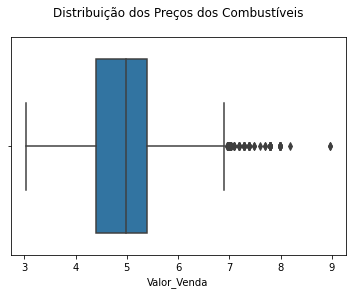

In [18]:
# Verificação de valores outliers da coluna Valor_Venda 
sns.boxplot(dados_tmp.Valor_Venda)
plt.title("Distribuição dos Preços dos Combustíveis\n")
plt.show()

> Podemos constatar a existência de valores outliers na coluna **Valor_Venda**!<br> 
Então será realizada uma análise de forma independente para cada produto (Etanol, Gasolina e Gasolina Aditivada), afim de verificar a distribuição dos preços e se os outliers irão precisar ser tratados. 

 #### 3.2b-Análise de Outliers do Produto Etanol

In [19]:
# Criar um dataframe temporário somente com Produto Etanol
df_etanol = dados_tmp.loc[dados_tmp.Produto == 'ETANOL']
df_etanol.head()

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
0,NE,AL,ARAPIRACA,PLANALTO,ETANOL,2023-01-02,3.89,NaN,R$ / litro
3,NE,AL,ARAPIRACA,CENTRO,ETANOL,2023-01-02,3.79,NaN,R$ / litro
5,NE,AL,ARAPIRACA,CANAFISTULA,ETANOL,2023-01-02,4.19,NaN,R$ / litro
8,NE,AL,ARAPIRACA,JARDIM ESPERANCA,ETANOL,2023-01-02,4.49,NaN,R$ / litro
11,SE,ES,VILA VELHA,DIVINO ESPIRITO SANTO,ETANOL,2023-01-02,4.19,NaN,R$ / litro


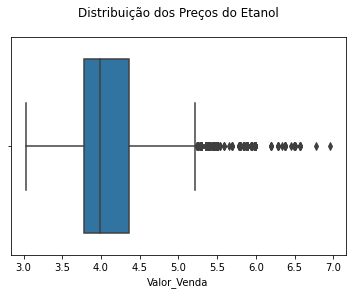

In [20]:
# Verificação de valores outliers do Produto Etanol
sns.boxplot(df_etanol.Valor_Venda)
plt.title("Distribuição dos Preços do Etanol\n")
plt.show()

In [21]:
# Exibindo os maiores preços do Etanol.  
df_etanol.nlargest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
88928,N,RO,PIMENTA BUENO,BEIRA RIO,ETANOL,2023-02-28,6.96,NaN,R$ / litro
79277,SE,MG,DIVINOPOLIS,CENTRO,ETANOL,2023-02-22,6.77,NaN,R$ / litro
26037,S,RS,PASSO FUNDO,CENTRO,ETANOL,2023-01-18,6.57,NaN,R$ / litro
29669,S,RS,PASSO FUNDO,CENTRO,ETANOL,2023-01-23,6.57,NaN,R$ / litro
75067,S,RS,PASSO FUNDO,CENTRO,ETANOL,2023-02-21,6.57,NaN,R$ / litro
90093,S,RS,PASSO FUNDO,CENTRO,ETANOL,2023-03-01,6.57,NaN,R$ / litro
97850,S,RS,PASSO FUNDO,CENTRO,ETANOL,2023-03-07,6.57,NaN,R$ / litro
105077,S,RS,PASSO FUNDO,CENTRO,ETANOL,2023-03-13,6.57,NaN,R$ / litro
102439,NE,AL,DELMIRO GOUVEIA,CENTRO,ETANOL,2023-03-08,6.50,NaN,R$ / litro
107390,NE,AL,DELMIRO GOUVEIA,CENTRO,ETANOL,2023-03-13,6.50,NaN,R$ / litro


In [22]:
# Filtrar os valores outliers e identificar a quantidade de registros que deverão ser removidos
etanol_outlier = df_etanol.loc[df_etanol.Valor_Venda >= 6.10]
etanol_outlier.shape

(33, 9)

In [23]:
# Verficação do Tamanho do dataframe temporário
df_etanol.shape

(45133, 9)

In [24]:
# Remoção dos registros outliers no dataframe temporário
df_etanol = df_etanol.drop(etanol_outlier.index)

In [25]:
# Verficação do Tamanho do dataframe temporário após remoção dos outliers
df_etanol.shape

(45100, 9)

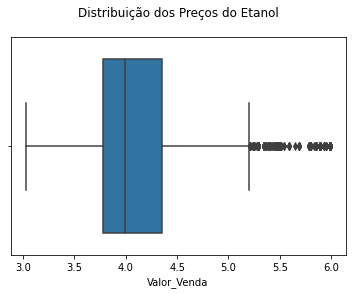

In [26]:
# Verificação do Produto Etanol após tratamento de outliers
sns.boxplot(df_etanol.Valor_Venda)
plt.title("Distribuição dos Preços do Etanol\n")
plt.show()

In [27]:
# Exibindo os maiores preços do Etanol após tratamento de outliers.  
df_etanol.nlargest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
537,S,RS,SANTA CRUZ DO SUL,CENTRO,ETANOL,2023-01-02,5.99,NaN,R$ / litro
6420,S,RS,ERECHIM,ESPIRITO SANTO,ETANOL,2023-01-04,5.99,NaN,R$ / litro
6820,S,RS,SANTA CRUZ DO SUL,AVENIDA,ETANOL,2023-01-04,5.99,NaN,R$ / litro
10877,S,RS,ERECHIM,ESPIRITO SANTO,ETANOL,2023-01-09,5.99,NaN,R$ / litro
13037,S,RS,SANTA CRUZ DO SUL,CENTRO,ETANOL,2023-01-10,5.99,NaN,R$ / litro
13046,S,RS,SANTA CRUZ DO SUL,CENTRO,ETANOL,2023-01-10,5.99,NaN,R$ / litro
14536,S,RS,SANTA CRUZ DO SUL,AVENIDA,ETANOL,2023-01-10,5.99,NaN,R$ / litro
16443,S,RS,OSORIO,CENTRO,ETANOL,2023-01-11,5.99,NaN,R$ / litro
19652,S,RS,SANTA CRUZ DO SUL,CENTRO,ETANOL,2023-01-16,5.99,NaN,R$ / litro
19663,S,RS,SANTA CRUZ DO SUL,CENTRO,ETANOL,2023-01-16,5.99,NaN,R$ / litro


> Conclusão da análise de valores outliers do Produto Etanol:
>* Identificamos valores extremos que interferem no preço médio e optei pela remoção dos respectivos registros, pois são apenas 33 registros que representam 0,07% do total de registros de etanol (45133).
>* Utilizei como filtro o valor de 6.10 (R$/litro)
>* Neste tópico foi realizado somente a análise de valores outliers e a remoção destes registros será realizada no item de tratamente e limpeza.

 #### 3.2c-Análise de Outliers do Produto Gasolina

In [28]:
# Criar um dataframe temporário somente com Produto Gasolina
df_gasolina = dados_tmp.loc[dados_tmp.Produto == 'GASOLINA']
df_gasolina.head()

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
2,NE,AL,ARAPIRACA,PLANALTO,GASOLINA,2023-01-02,5.14,NaN,R$ / litro
4,NE,AL,ARAPIRACA,CENTRO,GASOLINA,2023-01-02,5.29,NaN,R$ / litro
7,NE,AL,ARAPIRACA,CANAFISTULA,GASOLINA,2023-01-02,5.19,NaN,R$ / litro
10,NE,AL,ARAPIRACA,JARDIM ESPERANCA,GASOLINA,2023-01-02,5.79,NaN,R$ / litro
13,SE,ES,VILA VELHA,DIVINO ESPIRITO SANTO,GASOLINA,2023-01-02,4.89,NaN,R$ / litro


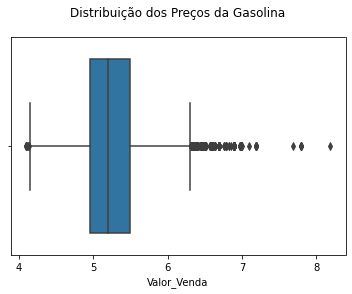

In [29]:
# Verificação de valores outliers do Produto Gasolina
sns.boxplot(df_gasolina.Valor_Venda)
plt.title("Distribuição dos Preços da Gasolina\n")
plt.show()

In [30]:
# Exibindo os maiores preços do Gasolina.  
df_gasolina.nlargest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
41901,SE,SP,ITATIBA,MORRO AZUL,GASOLINA,2023-01-30,8.19,NaN,R$ / litro
880,SE,SP,SAO PAULO,PINHEIROS,GASOLINA,2023-01-02,7.79,NaN,R$ / litro
900,SE,SP,SAO PAULO,ALTO DE PINHEIROS,GASOLINA,2023-01-02,7.79,NaN,R$ / litro
956,SE,SP,SAO PAULO,ALTO DE PINHEIROS,GASOLINA,2023-01-02,7.79,NaN,R$ / litro
992,SE,SP,SAO PAULO,VILA ANDRADE,GASOLINA,2023-01-02,7.79,NaN,R$ / litro
1019,SE,SP,SAO PAULO,VL OLIMPIA,GASOLINA,2023-01-02,7.79,NaN,R$ / litro
877,SE,SP,SAO PAULO,JURUBATUBA,GASOLINA,2023-01-02,7.69,NaN,R$ / litro
94824,SE,SP,SAO PAULO,JD PAULISTA,GASOLINA,2023-03-06,7.19,NaN,R$ / litro
94915,SE,SP,SAO PAULO,JD. AMERICA,GASOLINA,2023-03-06,7.19,NaN,R$ / litro
105678,SE,SP,SAO PAULO,JD PAULISTA,GASOLINA,2023-03-13,7.19,NaN,R$ / litro


In [31]:
# Filtrar os valores outliers e identificar a quantidade de registros que deverão ser removidos
gasolina_outlier = df_gasolina.loc[df_gasolina.Valor_Venda >= 7.00]
gasolina_outlier.shape

(17, 9)

In [32]:
# Verficação do Tamanho do dataframe temporário
df_gasolina.shape

(52257, 9)

In [33]:
# Remoção dos registros outliers no dataframe temporário
df_gasolina = df_gasolina.drop(gasolina_outlier.index)

In [34]:
# Verficação do Tamanho do dataframe temporário após remoção dos outliers
df_gasolina.shape

(52240, 9)

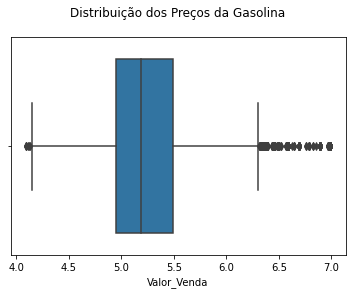

In [35]:
# Verificação do Produto Gasolina após tratamento de outliers
sns.boxplot(df_gasolina.Valor_Venda)
plt.title("Distribuição dos Preços da Gasolina\n")
plt.show()

In [36]:
# Exibindo os maiores preços do Gasolina após tratamento de outliers.  
df_gasolina.nlargest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
1188,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA,2023-01-02,6.99,NaN,R$ / litro
1892,SE,SP,SAO PAULO,CONSOLACAO,GASOLINA,2023-01-02,6.99,NaN,R$ / litro
4230,SE,SP,BARUERI,ALPHAVILLE,GASOLINA,2023-01-03,6.99,NaN,R$ / litro
6555,SE,SP,SAO PAULO,BROOKLIN PAULISTA,GASOLINA,2023-01-04,6.99,NaN,R$ / litro
6573,SE,SP,SAO PAULO,CHACARA ITAIM,GASOLINA,2023-01-04,6.99,NaN,R$ / litro
10377,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA,2023-01-09,6.99,NaN,R$ / litro
13879,SE,SP,BARUERI,ALPHAVILLE,GASOLINA,2023-01-10,6.99,NaN,R$ / litro
16624,SE,SP,SAO PAULO,BROOKLIN PAULISTA,GASOLINA,2023-01-11,6.99,NaN,R$ / litro
19958,SE,SP,SAO PAULO,PINHEIROS,GASOLINA,2023-01-16,6.99,NaN,R$ / litro
19976,SE,SP,SAO PAULO,ALTO DE PINHEIROS,GASOLINA,2023-01-16,6.99,NaN,R$ / litro


> Conclusão da análise de valores outliers do Produto Gasolina:
>* Identificamos valores extremos que interferem no preço médio e optei pela remoção dos respectivos registros, pois são apenas 17 registros que representam 0,03% do total de registros de gasolina (52257).
>* Utilizei como filtro o valor de 7.00 (R$/litro)
>* Neste tópico foi realizado somente a análise de valores outliers e a remoção destes registros será realizada no item de tratamente e limpeza.

 #### 3.2d-Análise de Outliers do Produto Gasolina Aditivada

In [37]:
# Criar um dataframe temporário somente com Produto Gasolina Aditivada
df_gasolina_adit = dados_tmp.loc[dados_tmp.Produto == 'GASOLINA ADITIVADA']
df_gasolina_adit.head()

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
1,NE,AL,ARAPIRACA,PLANALTO,GASOLINA ADITIVADA,2023-01-02,5.14,NaN,R$ / litro
6,NE,AL,ARAPIRACA,CANAFISTULA,GASOLINA ADITIVADA,2023-01-02,5.39,NaN,R$ / litro
9,NE,AL,ARAPIRACA,JARDIM ESPERANCA,GASOLINA ADITIVADA,2023-01-02,5.99,NaN,R$ / litro
12,SE,ES,VILA VELHA,DIVINO ESPIRITO SANTO,GASOLINA ADITIVADA,2023-01-02,4.99,NaN,R$ / litro
14,SE,ES,VILA VELHA,JABURUNA,GASOLINA ADITIVADA,2023-01-02,4.95,NaN,R$ / litro


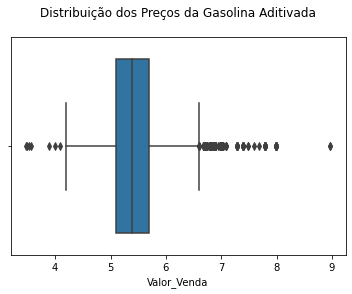

In [38]:
# Verificação de valores outliers do Produto Gasolina Aditivada
sns.boxplot(df_gasolina_adit.Valor_Venda)
plt.title("Distribuição dos Preços da Gasolina Aditivada\n")
plt.show()

In [39]:
# Exibindo os maiores preços do Gasolina Aditivada.  
df_gasolina_adit.nlargest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
105005,N,RO,ARIQUEMES,SETOR DE GRANDES AREAS,GASOLINA ADITIVADA,2023-03-13,8.97,NaN,R$ / litro
131860,NE,RN,MOSSORO,PLANALTO TREZE DE MAIO,GASOLINA ADITIVADA,2023-03-28,8.97,NaN,R$ / litro
899,SE,SP,SAO PAULO,ALTO DE PINHEIROS,GASOLINA ADITIVADA,2023-01-02,7.99,NaN,R$ / litro
1018,SE,SP,SAO PAULO,VL OLIMPIA,GASOLINA ADITIVADA,2023-01-02,7.99,NaN,R$ / litro
1187,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA ADITIVADA,2023-01-02,7.99,NaN,R$ / litro
10376,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA ADITIVADA,2023-01-09,7.99,NaN,R$ / litro
20241,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA ADITIVADA,2023-01-16,7.99,NaN,R$ / litro
30327,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA ADITIVADA,2023-01-23,7.99,NaN,R$ / litro
41134,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA ADITIVADA,2023-01-30,7.99,NaN,R$ / litro
51599,SE,SP,SAO PAULO,VL CLEMENTINO,GASOLINA ADITIVADA,2023-02-06,7.99,NaN,R$ / litro


In [40]:
# Exibindo os menores preços do Gasolina Aditivada.  
df_gasolina_adit.nsmallest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
42082,SE,SP,PRESIDENTE PRUDENTE,PARQUE CEDRAL,GASOLINA ADITIVADA,2023-01-30,3.47,NaN,R$ / litro
23572,SE,SP,SOROCABA,PARQUE BOA VISTA,GASOLINA ADITIVADA,2023-01-17,3.49,NaN,R$ / litro
44611,SE,SP,SOROCABA,ALEM LINHA,GASOLINA ADITIVADA,2023-01-31,3.53,NaN,R$ / litro
37518,NE,MA,ACAILANDIA,GETAT,GASOLINA ADITIVADA,2023-01-25,3.57,NaN,R$ / litro
56388,CO,DF,BRASILIA,RECANTO DAS EMAS,GASOLINA ADITIVADA,2023-02-07,3.89,NaN,R$ / litro
18952,SE,ES,VILA VELHA,GLORIA,GASOLINA ADITIVADA,2023-01-16,3.99,NaN,R$ / litro
46193,SE,MG,BETIM,SANTO ANTONIO,GASOLINA ADITIVADA,2023-01-31,4.09,NaN,R$ / litro
46621,SE,SP,MIRASSOL,CENTRO,GASOLINA ADITIVADA,2023-01-31,4.19,NaN,R$ / litro
84957,SE,SP,FRANCA,VILA APARECIDA,GASOLINA ADITIVADA,2023-02-27,4.19,NaN,R$ / litro
52702,SE,SP,RIBEIRAO PRETO,CAMPOS ELISEOS,GASOLINA ADITIVADA,2023-02-06,4.26,NaN,R$ / litro


In [41]:
# Filtrar os valores outliers superior e identificar a quantidade de registros que deverão ser removidos
gasolina_adit_outlierHigh = df_gasolina_adit.loc[df_gasolina_adit.Valor_Venda >= 7.20]
gasolina_adit_outlierHigh.shape

(60, 9)

In [42]:
# Filtrar os valores outliers e identificar a quantidade de registros que deverão ser removidos
gasolina_adit_outlierLow = df_gasolina_adit.loc[df_gasolina_adit.Valor_Venda <= 4.10]
gasolina_adit_outlierLow.shape

(7, 9)

In [43]:
# Verficação do Tamanho do dataframe temporário
df_gasolina_adit.shape

(40885, 9)

In [44]:
# Remoção dos registros outliers superior no dataframe temporário
df_gasolina_adit = df_gasolina_adit.drop(gasolina_adit_outlierHigh.index)

In [45]:
# Remoção dos registros outliers inferior no dataframe temporário
df_gasolina_adit = df_gasolina_adit.drop(gasolina_adit_outlierLow.index)

In [46]:
# Verficação do Tamanho do dataframe temporário após remoção dos outliers
df_gasolina_adit.shape

(40818, 9)

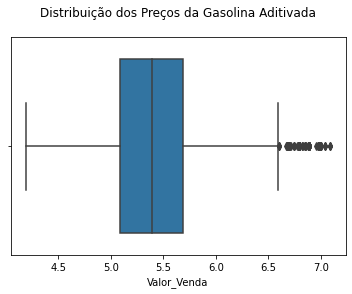

In [47]:
# Verificação do Produto Gasolina Aditivada após tratamento de outliers
sns.boxplot(df_gasolina_adit.Valor_Venda)
plt.title("Distribuição dos Preços da Gasolina Aditivada\n")
plt.show()

In [48]:
# Exibindo os maiores preços do Gasolina Aditivada após tratamento de outliers.  
df_gasolina_adit.nlargest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
100272,N,AM,PARINTINS,CENTRO,GASOLINA ADITIVADA,2023-03-08,7.09,NaN,R$ / litro
101871,N,AM,PARINTINS,SAO BENEDITO,GASOLINA ADITIVADA,2023-03-08,7.09,NaN,R$ / litro
102053,N,AM,PARINTINS,ITAUNA I,GASOLINA ADITIVADA,2023-03-08,7.09,NaN,R$ / litro
102563,N,AM,PARINTINS,CENTRO,GASOLINA ADITIVADA,2023-03-08,7.09,NaN,R$ / litro
102440,NE,AL,DELMIRO GOUVEIA,CENTRO,GASOLINA ADITIVADA,2023-03-08,7.04,NaN,R$ / litro
107391,NE,AL,DELMIRO GOUVEIA,CENTRO,GASOLINA ADITIVADA,2023-03-13,7.04,NaN,R$ / litro
118473,NE,AL,DELMIRO GOUVEIA,CENTRO,GASOLINA ADITIVADA,2023-03-20,7.04,NaN,R$ / litro
133075,NE,AL,DELMIRO GOUVEIA,CENTRO,GASOLINA ADITIVADA,2023-03-28,7.04,NaN,R$ / litro
38158,NE,BA,JEQUIE,CENTRO,GASOLINA ADITIVADA,2023-01-26,7.00,NaN,R$ / litro
80027,NE,BA,JEQUIE,CENTRO,GASOLINA ADITIVADA,2023-02-23,7.00,NaN,R$ / litro


In [49]:
# Exibindo os menores preços do Gasolina Aditivada após tratamento de outliers.  
df_gasolina_adit.nsmallest(15, "Valor_Venda")

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda,Valor_Compra,Unidade_Medida
46621,SE,SP,MIRASSOL,CENTRO,GASOLINA ADITIVADA,2023-01-31,4.19,NaN,R$ / litro
84957,SE,SP,FRANCA,VILA APARECIDA,GASOLINA ADITIVADA,2023-02-27,4.19,NaN,R$ / litro
52702,SE,SP,RIBEIRAO PRETO,CAMPOS ELISEOS,GASOLINA ADITIVADA,2023-02-06,4.26,NaN,R$ / litro
61755,SE,SP,RIBEIRAO PRETO,CAMPOS ELISEOS,GASOLINA ADITIVADA,2023-02-13,4.29,NaN,R$ / litro
63979,SE,ES,VILA VELHA,COBI DE CIMA,GASOLINA ADITIVADA,2023-02-13,4.29,NaN,R$ / litro
72494,SE,SP,RIBEIRAO PRETO,CAMPOS ELISEOS,GASOLINA ADITIVADA,2023-02-20,4.29,NaN,R$ / litro
75743,S,PR,LONDRINA,JARDIM PALMARES,GASOLINA ADITIVADA,2023-02-21,4.29,NaN,R$ / litro
32743,NE,PE,RECIFE,GUABIRABA,GASOLINA ADITIVADA,2023-01-24,4.31,NaN,R$ / litro
31387,SE,SP,SAO JOSE DOS CAMPOS,CENTRO,GASOLINA ADITIVADA,2023-01-23,4.33,NaN,R$ / litro
52570,SE,SP,RIBEIRAO PRETO,CENTRO,GASOLINA ADITIVADA,2023-02-06,4.33,NaN,R$ / litro


> Conclusão da análise de valores outliers do Produto Gasolina Aditivada:
>* Identificamos valores extremos que interferem no preço médio e optei pela remoção dos respectivos registros, pois são apenas 67 registros que representam 0,16 % do total de registros de gasolina aditivada (40885).
>* Utilizei como filtro superior o valor de 7.20 e o filtro inferior o valor de 4,10 (R$/litro)
>* Neste tópico foi realizado somente a análise de valores outliers e a remoção destes registros será realizada no item de tratamente e limpeza.

### 3.3-Medidas de Tendencia Central

 #### 3.3c-Etanol

In [50]:
# Descrição dos registros do Produto Etanol
round(df_etanol.describe(),2)

,Valor_Venda,Valor_Compra
count,45100.00,0.0
mean,4.07,NaN
std,0.43,NaN
min,3.03,NaN
25%,3.78,NaN
50%,3.99,NaN
75%,4.35,NaN
max,5.99,NaN


In [51]:
# Verificando o valor que mais se repete para o Produto Etanol
df_etanol.Valor_Venda.mode()

0    3.99
dtype: float64

> Podemos conlcuir que o valor de venda do etanol (R$ / litro) no 1º trimestre de 2023:
>* varia entre 3,03 a 5,99
>* Tem preço médio nacional de 4,07
>* O valor central do conjunto de registros é de 3,99
>* O valor mais aplicado é de 3,99 
>* Tem um desvio padrão de 0.43 indicando que a distribuição dos registros tendem a estar próximo da valor médio
>* Para esta análise foi utilizado um conjunto de 45.100 registros

 #### 3.3b-Gasolina 

In [52]:
# Descrição dos registros do Produto Gasolina
round(df_gasolina.describe(),2)

,Valor_Venda,Valor_Compra
count,52240.00,0.0
mean,5.23,NaN
std,0.40,NaN
min,4.09,NaN
25%,4.95,NaN
50%,5.19,NaN
75%,5.49,NaN
max,6.99,NaN


In [53]:
# Verificando o valor que mais se repete para o Produto Etanol
df_gasolina.Valor_Venda.mode()

0    4.99
dtype: float64

> Podemos conlcuir que o valor de venda da gasolina (R$ / litro) no 1º trimestre de 2023:
>* varia entre 4,09 a 6,99
>* Tem preço médio nacional de 5,23
>* O valor central do conjunto de registros é de 5,19
>* O valor mais aplicado é de 4,99 
>* Tem um desvio padrão de 0.40 indicando que a distribuição dos registros tendem a estar próximo da valor médio
>* Para esta análise foi utilizado um conjunto de 52.240 registros

 #### 3.3c-Gasolina Aditivada

In [54]:
# Descrição dos registros do Produto Gasolina
round(df_gasolina_adit.describe(),2)

,Valor_Venda,Valor_Compra
count,40818.00,0.0
mean,5.41,NaN
std,0.41,NaN
min,4.19,NaN
25%,5.09,NaN
50%,5.39,NaN
75%,5.69,NaN
max,7.09,NaN


In [55]:
# Verificando o valor que mais se repete para o Produto Etanol
df_gasolina_adit.Valor_Venda.mode()

0    5.19
dtype: float64

> Podemos conlcuir que o valor de venda da gasolina (R$ / litro) no 1º trimestre de 2023:
>* varia entre 4,19 a 7,09
>* Tem preço médio nacional de 5,41
>* O valor central do conjunto de registros é de 5,39
>* O valor mais aplicado é de 5,19 
>* Tem um desvio padrão de 0.41 indicando que a distribuição dos registros tendem a estar próximo da valor médio
>* Para esta análise foi utilizado um conjunto de 40.818 registros

## 4-Tratamento e Limpeza

### -Tratamento de valores ausentes

In [56]:
# Excluir colunas que não contribuem para a análise
dados_tmp2 = dados_tmp.drop(['Valor_Compra','Unidade_Medida'],axis =1)

> Colunas com valores constantes ou completamente vazias não contribuem para análise, então ambas as colunas deverão ser desconsideradas.

In [57]:
dados_tmp2.shape

(138275, 7)

### -Tratamento de Valores ausentes na coluna Bairro pelo metodo de inputação

In [58]:
# Total de valores ausentes na coluna Bairro antes do tratamento
dados_tmp2.Bairro.isna().sum()

316

In [59]:
# Imputação de valores 'sem nome' nos registros ausentes. 
dados_tmp2.Bairro.fillna('sem nome', inplace = True)

In [60]:
# Total de valores ausentes na coluna Bairro após o tratamento
dados_tmp2.Bairro.isna().sum()

0

In [61]:
# Total de inputação da string 'sem nome' na coluna Bairro
dados_tmp2.Bairro.isin(['sem nome']).sum()

316

> Foram substituidos 316 valores ausentes pela informação 'sem nome' na coluna **Bairro**

### -Tratamento de Valores Outlies

In [62]:
# Verificando o tamanho do dataframe antes da remoção dos outliers no conjunto de dados
dados_tmp2.shape

(138275, 7)

In [63]:
# Remoção dos registros outliers do Produto Etanol no conjunto de dados
dados_tmp3 = dados_tmp2.drop(etanol_outlier.index)
dados_tmp3.shape

(138242, 7)

In [64]:
# Remoção dos registros outliers do Produto Gasolina no conjunto de dados
dados_tmp4 = dados_tmp3.drop(gasolina_outlier.index)
dados_tmp4.shape

(138225, 7)

In [65]:
# Remoção dos registros outliers superior do Produto Gasolina Aditivada no conjunto de dados
dados_tmp5 = dados_tmp4.drop(gasolina_adit_outlierHigh.index)
dados_tmp5.shape

(138165, 7)

In [66]:
# Remoção dos registros outliers inferior do Produto Gasolina Aditivada no conjunto de dados
dados_tmp6 = dados_tmp5.drop(gasolina_adit_outlierLow.index)
dados_tmp6.shape

(138158, 7)

>Foram removidos um total de 117 registros outliers

## 5-Salvando o Dataset após Processamento de Dados

In [67]:
# Verificando a quantidade de resgistros por Produto após o processamento dos dados
dados_tmp6.groupby('Produto').count()

,Regiao,Estado,Municipio,Bairro,Data_Coleta,Valor_Venda
Produto,,,,,,
ETANOL,45100,45100,45100,45100,45100,45100
GASOLINA,52240,52240,52240,52240,52240,52240
GASOLINA ADITIVADA,40818,40818,40818,40818,40818,40818


In [68]:
df = dados_tmp6

In [69]:
df.head()

,Regiao,Estado,Municipio,Bairro,Produto,Data_Coleta,Valor_Venda
0,NE,AL,ARAPIRACA,PLANALTO,ETANOL,2023-01-02,3.89
1,NE,AL,ARAPIRACA,PLANALTO,GASOLINA ADITIVADA,2023-01-02,5.14
2,NE,AL,ARAPIRACA,PLANALTO,GASOLINA,2023-01-02,5.14
3,NE,AL,ARAPIRACA,CENTRO,ETANOL,2023-01-02,3.79
4,NE,AL,ARAPIRACA,CENTRO,GASOLINA,2023-01-02,5.29


In [70]:
# Salva a tabela processada no formato CSV para analise no Power BI
df.to_csv('dados/preco_tratado.csv', index = False)

## 6-Análise de Dados no Power BI

<p>Apartir dos dados processados previamente foi elaborado um relátorio no Power BI, com o auxilio de gráficos, expressões DAX (Expressões de Análise de Dados) e títulos dinâmicos.</p>
<br>Segue abaixo um dashboard com uma visão geral do relarório, onde podemos observar o preço médio dos combustíveis (Etanol, Gasolina e Gasolina Aditivada).
<br>O relatório abrange nível de detalhes hierárquicos, em que podemos visualizar as informações no nível nacional, regional e estadual.Também podemos analisar o preço médio ao longo do tempo e sua respestiva tendência.


**Nota:** Lembrando que os dados são de domínio público e refence-se ao 1º Trimestre de 2023

![](imagens/img_01.png)

#### Descrição do Dashboard:<br>
O relatório do Power BI é dinâmico, ao selecionar um item os outros gráficos irão exibir a informação do respectivo item, por exemplo: Se o estado do Rio de Janeiro for selecionado os outros gráficos irão exibir as informações do Rio de Janeiro.


* 1- Mapa do Brasil, onde é possivel selcionar o estado desejado. Um click para selecionar e um click no item selecionado para desmarcar
* 2- Exibe o preço médio por região. Um click na sigla da região para selecionar
* 3- Exibe os 3 estados com maior preço médio de cada produto¹
* 4- Exibe o preço mínimo (canto esquerdo), preço médio (central) e o preço máximo (canto direito) de cada produto
* 5- Exibe o preço médio ao longo do tempo podendo ser visualizado em meses ou dias
* 6- Exibe a tendencia do preço médio 

<br>**Nota1:** Os gráficos do 'top 3 estados com maior preço médio' são fixos e não interagem com os filtros.

![](imagens/img_02.png)

Segue a visualização do preço médio de cada produto por região:
* CO - Centro Oeste
* N - Norte
* NE - Nordeste
* S - Sul
* SE - Sudeste

![](imagens/img_03.png)

![](imagens/img_04.png)

![](imagens/img_05.png)

![](imagens/img_06.png)

![](imagens/img_07.png)

Segue a visualização do preço médio de cada produto por estado

![](imagens/img_08.png)

A seguir podemos observar a navegação da variação do preço médio através da hierarquia, para isso basta clicar no ícone destacado 'Expandir todo o campo um nível abaixo na hierarquia' para alterar o modo de visualização de variação mensal para variação diária.

O nível de detalhe hierarquico também está disponível para o gráfico de tendência (Média Móvel)

**Nota:** Na parte inferior do próprio gráfico será exibido uma barra de rolagem, que permite a visualização de toda a extensão do gráfico ao deslizar para esquerda ou para direita.

![](imagens/img_09.png)

![](imagens/img_10.png)

![](imagens/img_11.png)

Para subir a hierarquia para visualização mensal, basta clicar no ícone destacado 'Fazer drill up'.

![](imagens/img_12.png)

## 7-Relatório Final

**1-Análise do panorama nacional:**<br>
-Podemos constatar que no 1º trimestre de 2023 há uma tendência de aumento de preço nos 3 três produtos avaliados, sendo que na gasolina e gasolina aditivada tendendo para um aumento mais expressivo e já no etanol houve um aumento menos expressivo se aproximando da estabilidade.<br>
<br>-Houve aumento de preço nos combustíveis em todo o território nacional no mês de março em comparação ao mês de fevereiro:
* aumento de +8,03% para Gasolina
* aumento de +7,95% para Gasolina Aditivada 
* aumento de +2,99% para Etanol

**Nota:** A única exceção seria o estado do Amapá onde o preço médio do etanol teve uma leve queda de -0,57%  no mês de  março em comparação ao mês de fevereiro de 2023. Porém há em alguns estados, em especial da região norte, períodos sem coleta de dados no mês de março, inclusive o estado do Amapá é um deles, portanto não podemos afirmar que houve realmente queda no preço médio do etanol no Amapá.<br>

**2-Análise do panorama regional:**<br>
-Seguindo a tendência nacional todas as regiões do Brasil tiveram aumento no preço médio nos combustíveis.<br>
-Das regiões do Brasil, a região norte é a que apresentou o maior preço médio, seguido pela região nordeste.<br>
-Segue a classificação das regiões com maior preço médio segmentado por produto

|Rank |Etanol|Gasolina|Gasolina Aditivada|
|:-:|:-:|:-:|:-:|
|1  | Norte | Norte | Norte |
|2  | Sul | Nordeste | Nordeste |
|3  | Nordeste | Sul | Sul |
|4  | Sudeste | Centro Oeste | Sudeste |
|5  | Centro Oeste | Sudeste | Centro Oeste |

**3-Análise do panorama estadual**<br>
-Ao analisar os estados baseado no Top3 podemos confirmar a tendência observada no panorama regional, em que os estados com maior preço médio de gasolina e gasolina aditivada estão localizados nas regiões norte e nordeste. Os maiores preços médios do etanol estão distribuidos nas regiões norte e sul.<br>

-Com uma análise mais aprofundada na base de dados podemos afirmar que 1/3 da classificação, ou seja, nas nove (9) primeiras colocações prevalecem as regiões norte e nordeste ao que se refere ao preço médio da gasolina e gasolina aditivada. Já o etanol possui no Top9 uma distribuição mais ampla nas regiões norte, nordeste e sul.<br>


**Conclusão**<br>
Podemos concluir que no mês de março de 2023 ficou mais caro abastecer os automóveis no Brasil, principalmente nas regiões Norte e Nordeste.

# FIM